In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']=19,9
import warnings
warnings.filterwarnings("ignore")

In [401]:
df=pd.read_csv("/kaggle/input/bike-rental-system-time-series/bike.csv")

In [402]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [403]:
df=df[['dteday','cnt']]

In [404]:
df.columns=['Date','Count']

In [405]:
df

,Date,Count
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    731 non-null    object
 1   Count   731 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.5+ KB


In [407]:
df['Date']=pd.to_datetime(df['Date'])

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    731 non-null    datetime64[ns]
 1   Count   731 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.5 KB


In [409]:
df.isnull().sum()

Date     0
Count    0
dtype: int64

In [410]:
df

,Date,Count
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


In [411]:
df.set_index('Date',inplace=True)

In [412]:
df

,Count
Date,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341


<AxesSubplot:xlabel='Date'>

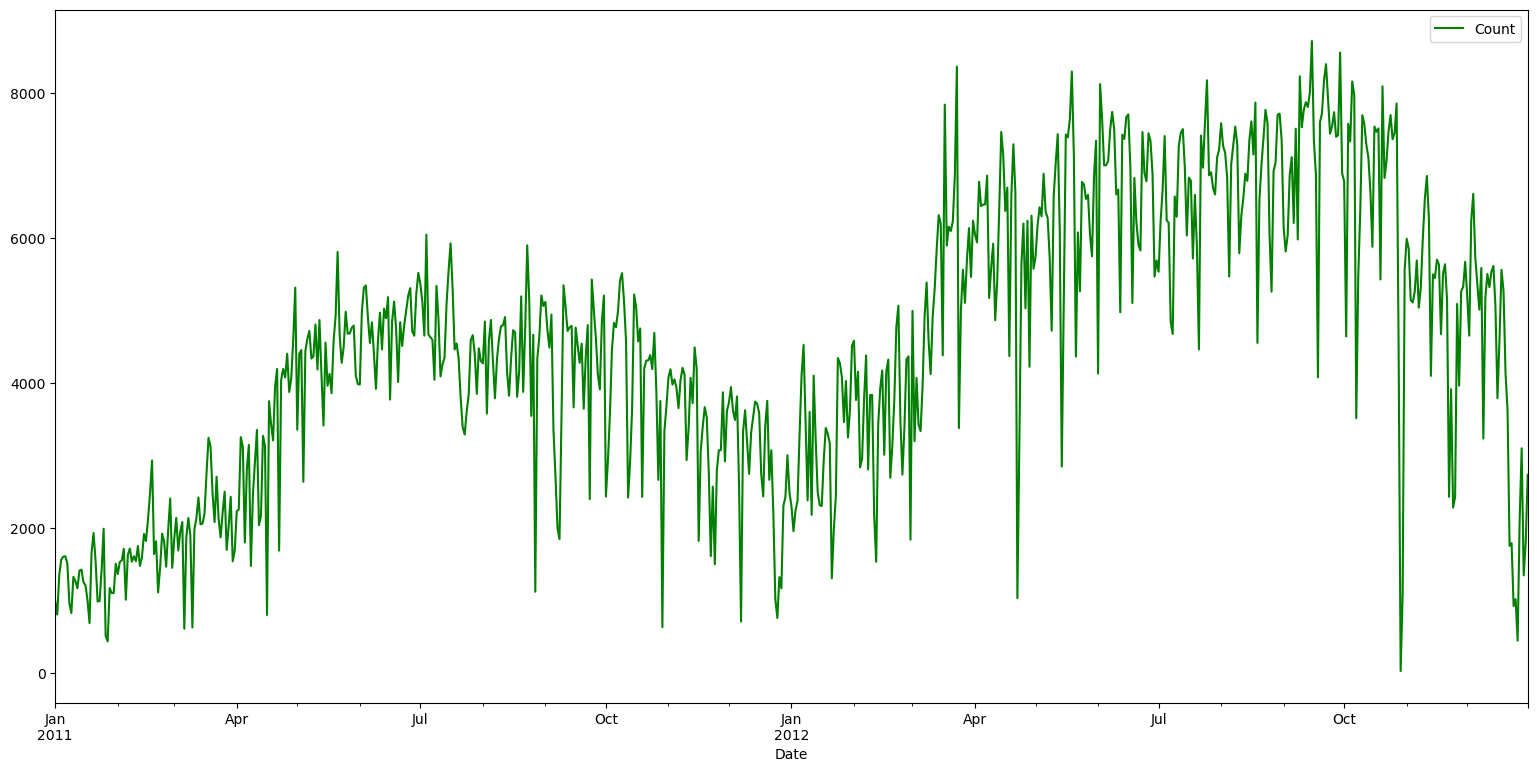

In [413]:
df.plot(color='green')

# Lets Check stationarity by doing ADFuller Test

In [414]:
from statsmodels.tsa.stattools import adfuller

In [415]:
adf=adfuller(df,regression='c',autolag='AIC')

In [416]:
adf

(-1.877448144437429,
 0.3427434403392198,
 13,
 717,
 {'1%': -3.439503230053971,
  '5%': -2.8655794463678346,
  '10%': -2.5689210707289982},
 11740.390931163352)

In [417]:
if adf[1] > 0.05:
    print("Null Hypothesis--------------> Data Not Stationary")
else:
    print("Rejecting Null Hypothesis--------------> Data is Stationary")

Null Hypothesis--------------> Data Not Stationary


# Lets Do Log Transformation

In [418]:
df_log=np.log(df)

In [419]:
df_log

,Count
Date,
2011-01-01,6.892642
2011-01-02,6.685861
2011-01-03,7.207119
2011-01-04,7.353722
2011-01-05,7.377759
...,...
2012-12-27,7.656337
2012-12-28,8.037543
2012-12-29,7.201171


In [420]:
adf_log=adfuller(df_log,autolag='AIC')

In [421]:
if adf_log[1] > 0.05:
    print("Null Hypothesis--------------> Data Not Stationary")
else:
    print("Rejecting Null Hypothesis--------------> Data is Stationary")

Null Hypothesis--------------> Data Not Stationary


# Lets Do shifting Method

In [422]:
df_new=df - df.shift(1)

In [423]:
df_new

,Count
Date,
2011-01-01,NaN
2011-01-02,-184.0
2011-01-03,548.0
2011-01-04,213.0
2011-01-05,38.0
...,...
2012-12-27,1673.0
2012-12-28,981.0
2012-12-29,-1754.0


In [424]:
df_new.dropna(inplace=True)

In [425]:
df_new

,Count
Date,
2011-01-02,-184.0
2011-01-03,548.0
2011-01-04,213.0
2011-01-05,38.0
2011-01-06,6.0
...,...
2012-12-27,1673.0
2012-12-28,981.0
2012-12-29,-1754.0


<AxesSubplot:xlabel='Date'>

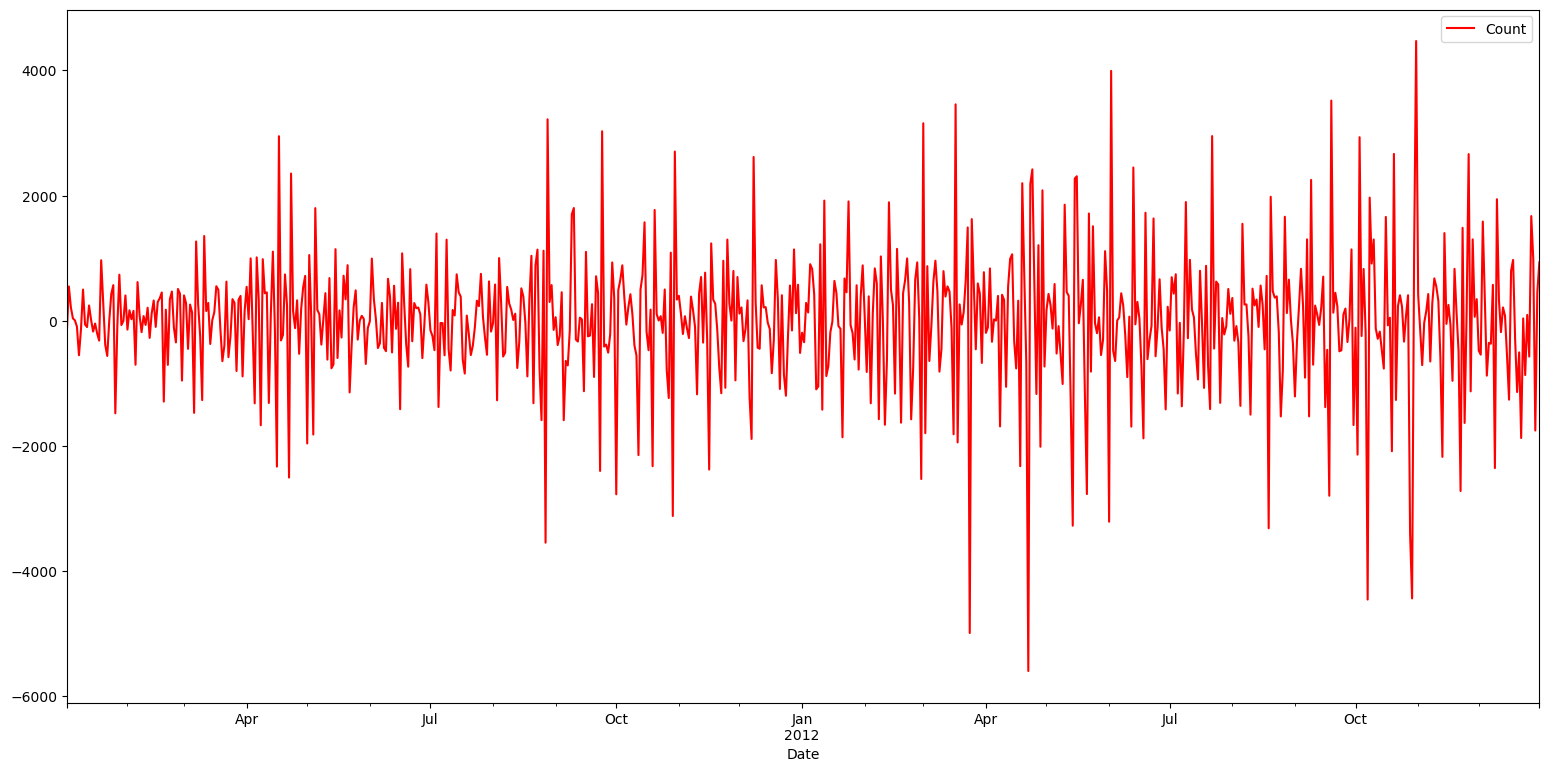

In [426]:
df_new.plot(color='red')

In [427]:
adf_shift=adfuller(df_new)

In [428]:
if adf_shift[1] > 0.05:
    print("Null Hypothesis--------------> Data Not Stationary")
else:
    print("Rejecting Null Hypothesis--------------> Data is Stationary")

Rejecting Null Hypothesis--------------> Data is Stationary


# Now Data is Stationary

In [429]:
df_new

,Count
Date,
2011-01-02,-184.0
2011-01-03,548.0
2011-01-04,213.0
2011-01-05,38.0
2011-01-06,6.0
...,...
2012-12-27,1673.0
2012-12-28,981.0
2012-12-29,-1754.0


# lets do Standard Scaler

In [430]:
from sklearn.preprocessing import StandardScaler

In [431]:
scaler=StandardScaler()

In [432]:
df_scaler=scaler.fit_transform(df_new)

In [433]:
df_scaler

array([[-1.75091220e-01],
       [ 5.12539193e-01],
       [ 1.97844946e-01],
       [ 3.34524295e-02],
       [ 3.39208356e-03],
       [-9.24252691e-02],
       [-5.19845813e-01],
       [-1.30940087e-01],
       [ 4.66509288e-01],
       [-5.67286083e-02],
       [-9.71221981e-02],
       [ 2.26965906e-01],
       [ 1.18465558e-02],
       [-1.64757976e-01],
       [-4.35772069e-02],
       [-1.93878937e-01],
       [-3.00029533e-01],
       [ 9.06141847e-01],
       [ 2.57965638e-01],
       [-3.62968382e-01],
       [-5.30179057e-01],
       [ 2.45269775e-03],
       [ 4.01691667e-01],
       [ 5.32266295e-01],
       [-1.39159584e+00],
       [-7.26981671e-02],
       [ 6.89143725e-01],
       [-6.70618522e-02],
       [-4.12300293e-03],
       [ 3.78207022e-01],
       [-1.34697631e-01],
       [ 1.53693813e-01],
       [ 2.03010281e-02],
       [ 1.46178727e-01],
       [-6.62632456e-01],
       [ 5.78296199e-01],
       [ 8.13611058e-02],
       [-1.73212449e-01],
       [ 6.8

# Lets Plot ACF, PACF

In [434]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

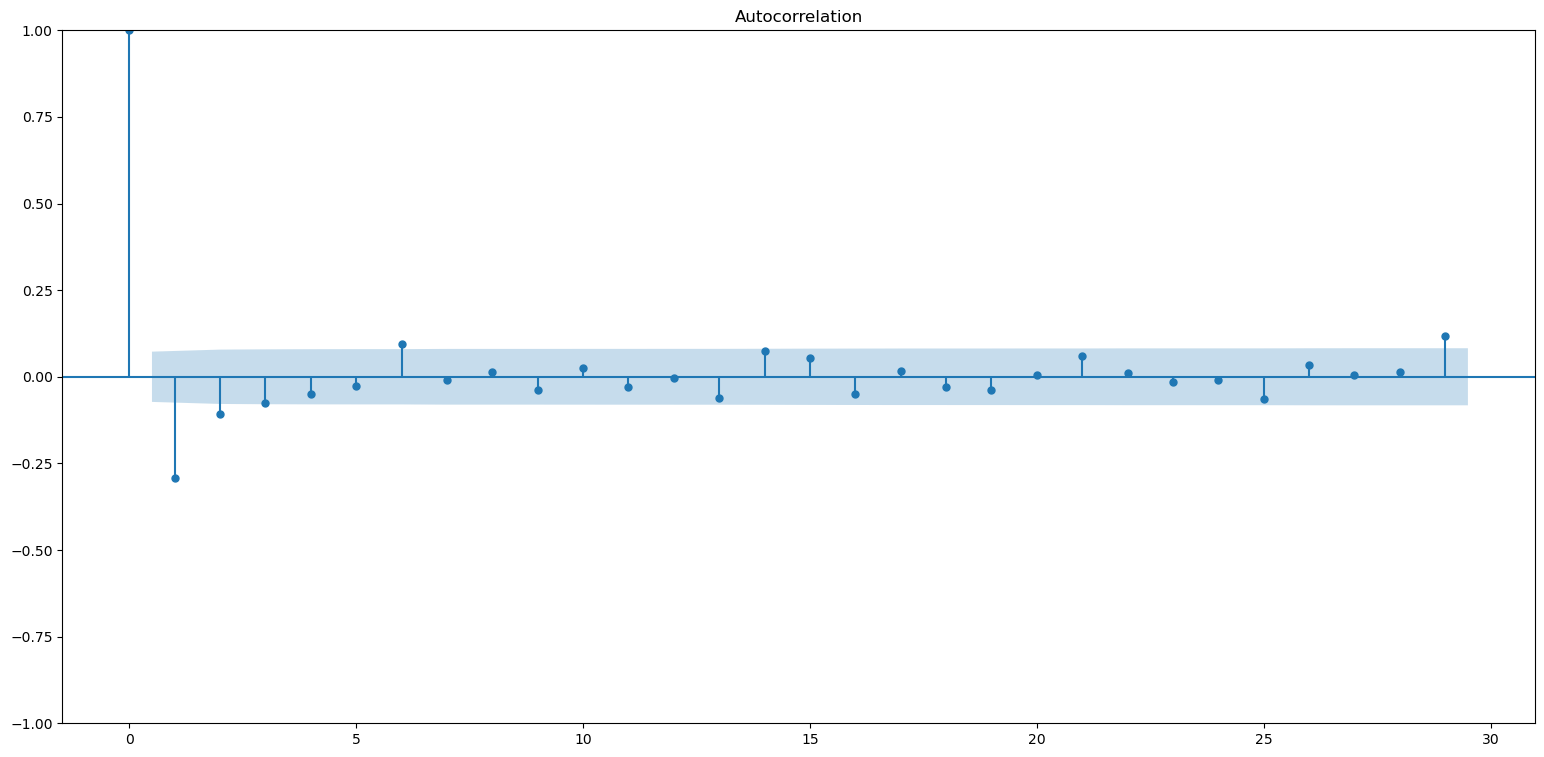

In [435]:
plot_acf(df_scaler)
plt.show()

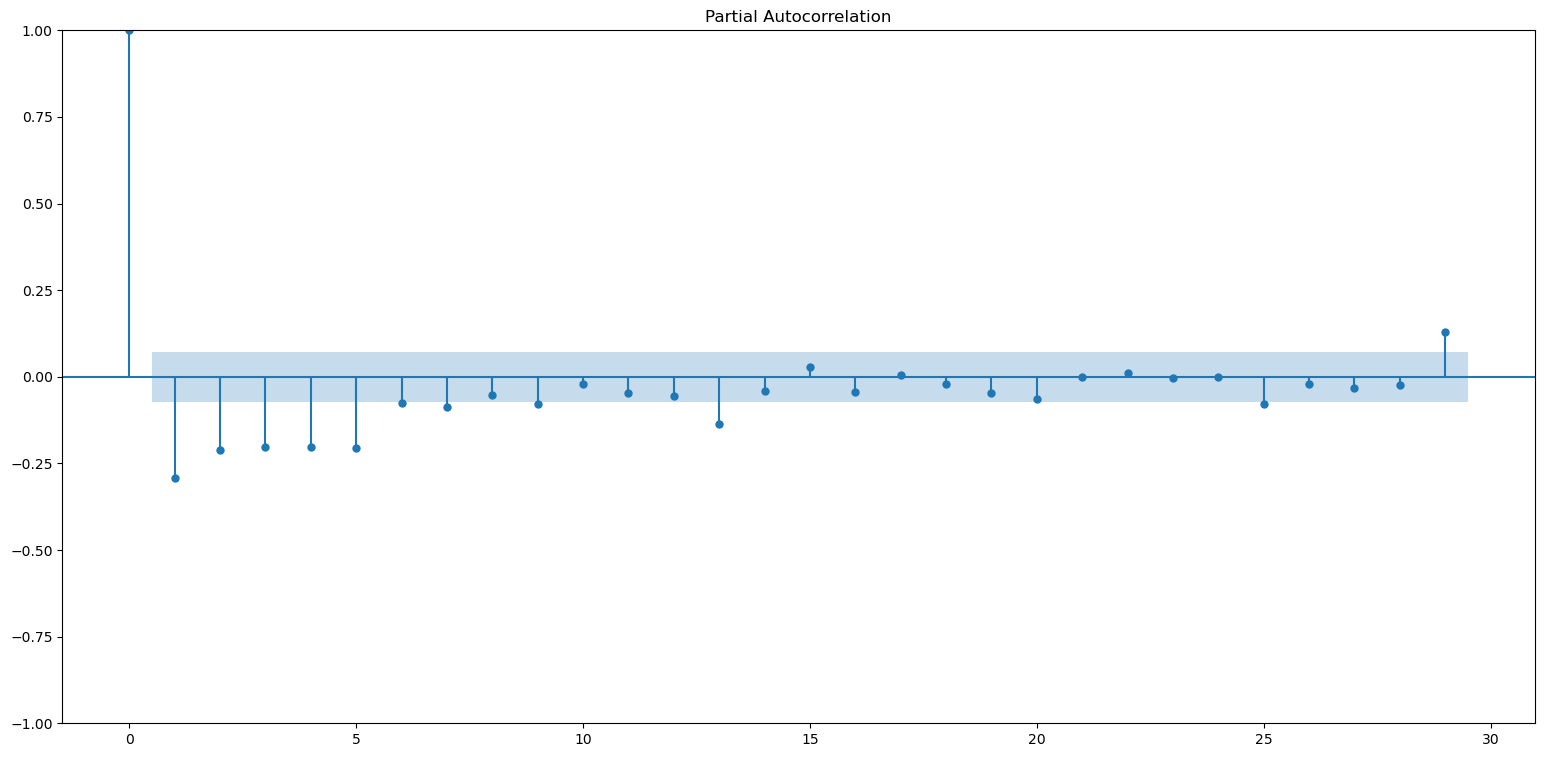

In [436]:
plot_pacf(df_scaler)
plt.show()

# Lets Split The Data

In [437]:
from sklearn.model_selection import train_test_split

In [438]:
train,test=train_test_split(df_scaler,test_size=0.2,shuffle=False)

In [439]:
train.shape

(584, 1)

In [440]:
test.shape

(146, 1)

# Lets Do AR Model

In [441]:
from statsmodels.tsa.ar_model import AutoReg

In [442]:
model_ar=AutoReg(train,lags=1)

In [443]:
model_ar_fit=model_ar.fit()

In [444]:
predict_ar=model_ar_fit.predict(start=len(train),end=len(train)+145)

In [445]:
predict_ar

array([-0.06873037,  0.03317394, -0.00024609,  0.01071417,  0.0071197 ,
        0.00829852,  0.00791192,  0.00803871,  0.00799713,  0.00801077,
        0.00800629,  0.00800776,  0.00800728,  0.00800744,  0.00800739,
        0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,
        0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,
        0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,
        0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,
        0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,
        0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,
        0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,
        0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,
        0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,
        0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,
        0.0080074 ,  0.0080074 ,  0.0080074 ,  0.0080074 ,  0.00

# Lets Measure Accuracy

In [446]:
from sklearn.metrics import mean_squared_error

In [447]:
mse_ar=np.sqrt(mean_squared_error(test,predict_ar))

In [448]:
mse_ar

1.208911848956117

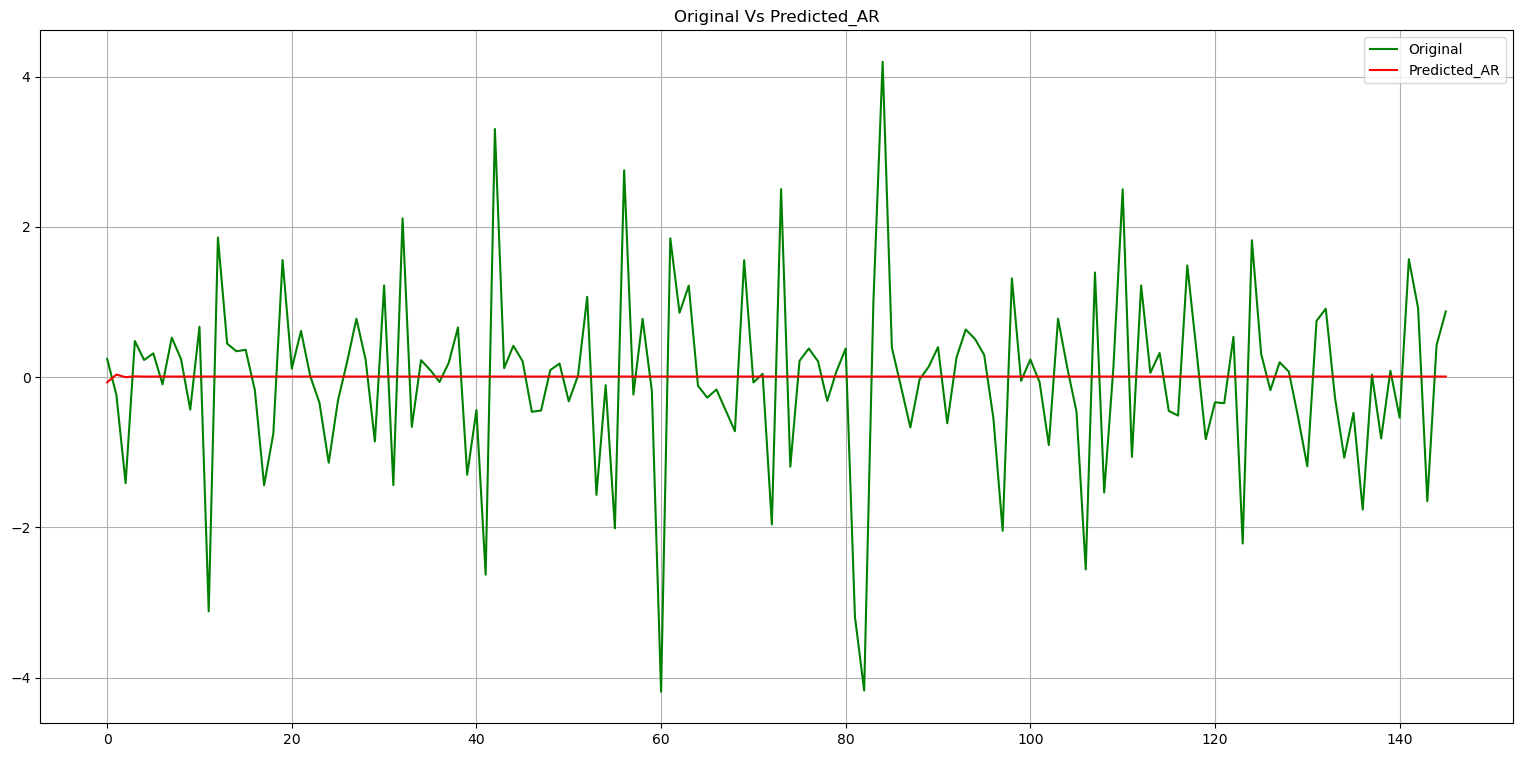

In [449]:
plt.plot(test,label='Original',color='green')
plt.plot(predict_ar,label='Predicted_AR',color='red')
plt.legend()
plt.title("Original Vs Predicted_AR")
plt.grid()
plt.show()

# Lets do MA Model

In [450]:
from statsmodels.tsa.arima.model import ARIMA

In [451]:
model_ma=ARIMA(train,order=(0,0,3))

In [452]:
model_ma_fit=model_ma.fit()

In [453]:
predict_ma=model_ma_fit.predict(start=len(train),end=len(train)+145)

In [454]:
predict_ma

array([-0.20144685, -0.06944961, -0.00383853,  0.00706834,  0.00706834,
        0.00706834,  0.00706834,  0.00706834,  0.00706834,  0.00706834,
        0.00706834,  0.00706834,  0.00706834,  0.00706834,  0.00706834,
        0.00706834,  0.00706834,  0.00706834,  0.00706834,  0.00706834,
        0.00706834,  0.00706834,  0.00706834,  0.00706834,  0.00706834,
        0.00706834,  0.00706834,  0.00706834,  0.00706834,  0.00706834,
        0.00706834,  0.00706834,  0.00706834,  0.00706834,  0.00706834,
        0.00706834,  0.00706834,  0.00706834,  0.00706834,  0.00706834,
        0.00706834,  0.00706834,  0.00706834,  0.00706834,  0.00706834,
        0.00706834,  0.00706834,  0.00706834,  0.00706834,  0.00706834,
        0.00706834,  0.00706834,  0.00706834,  0.00706834,  0.00706834,
        0.00706834,  0.00706834,  0.00706834,  0.00706834,  0.00706834,
        0.00706834,  0.00706834,  0.00706834,  0.00706834,  0.00706834,
        0.00706834,  0.00706834,  0.00706834,  0.00706834,  0.00

In [455]:
mse_ma=np.sqrt(mean_squared_error(test,predict_ma))

In [456]:
mse_ma

1.2090251988655445

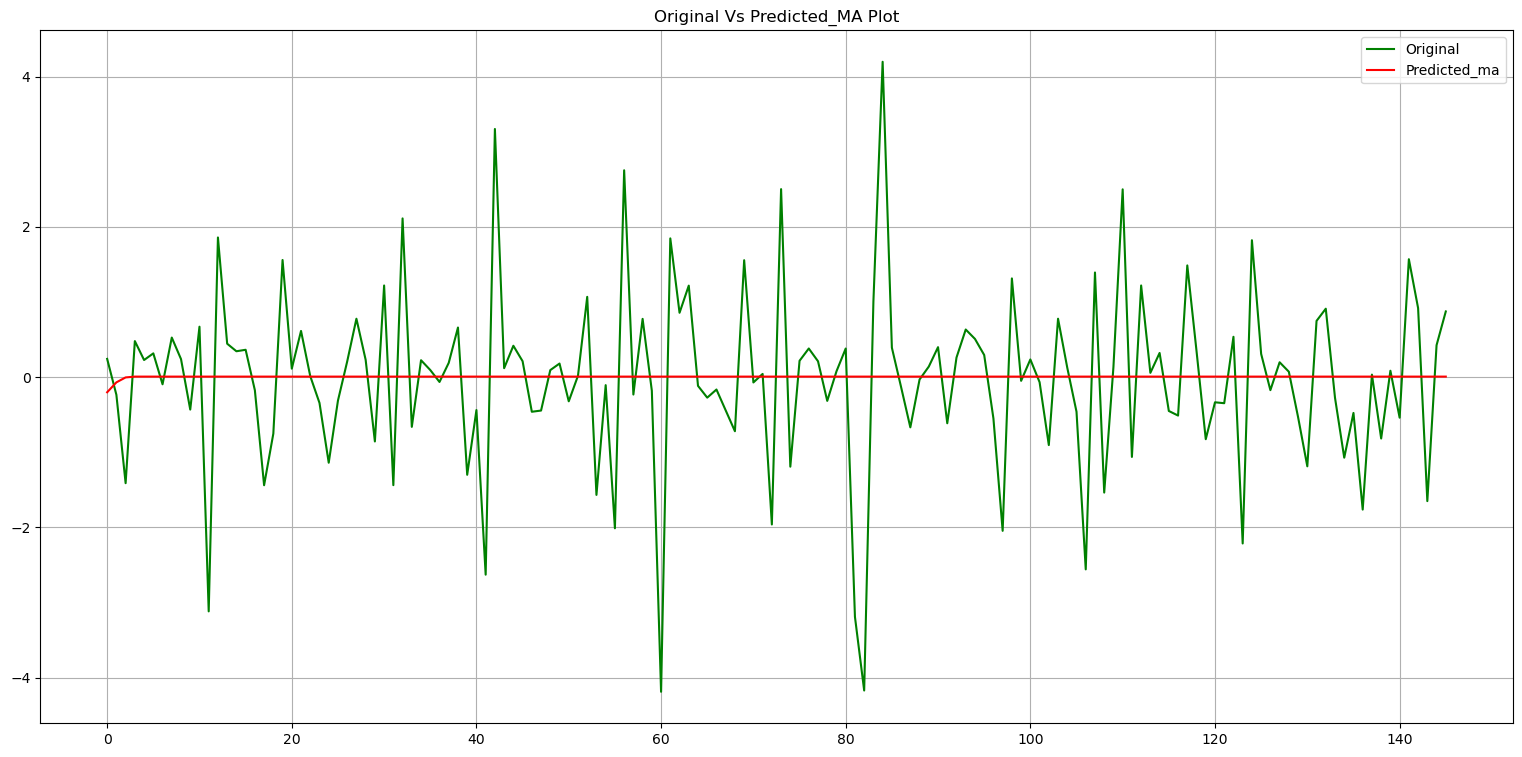

In [457]:
plt.plot(test,label='Original',color='green')
plt.plot(predict_ma,label='Predicted_ma',color='red')
plt.title("Original Vs Predicted_MA Plot")
plt.grid()
plt.legend()
plt.show()

# Lets Do ARMA Model

In [458]:
from statsmodels.tsa.arima.model import ARIMA

In [459]:
model_arma=ARIMA(train,order=(4,0,3))

In [460]:
model_arma_fit=model_arma.fit()

In [461]:
predict_arma=model_arma_fit.predict(start=len(train),end=len(train)+145)

In [462]:
mse_arma=np.sqrt(mean_squared_error(test,predict_arma))

In [463]:
mse_arma

1.2083545266871623

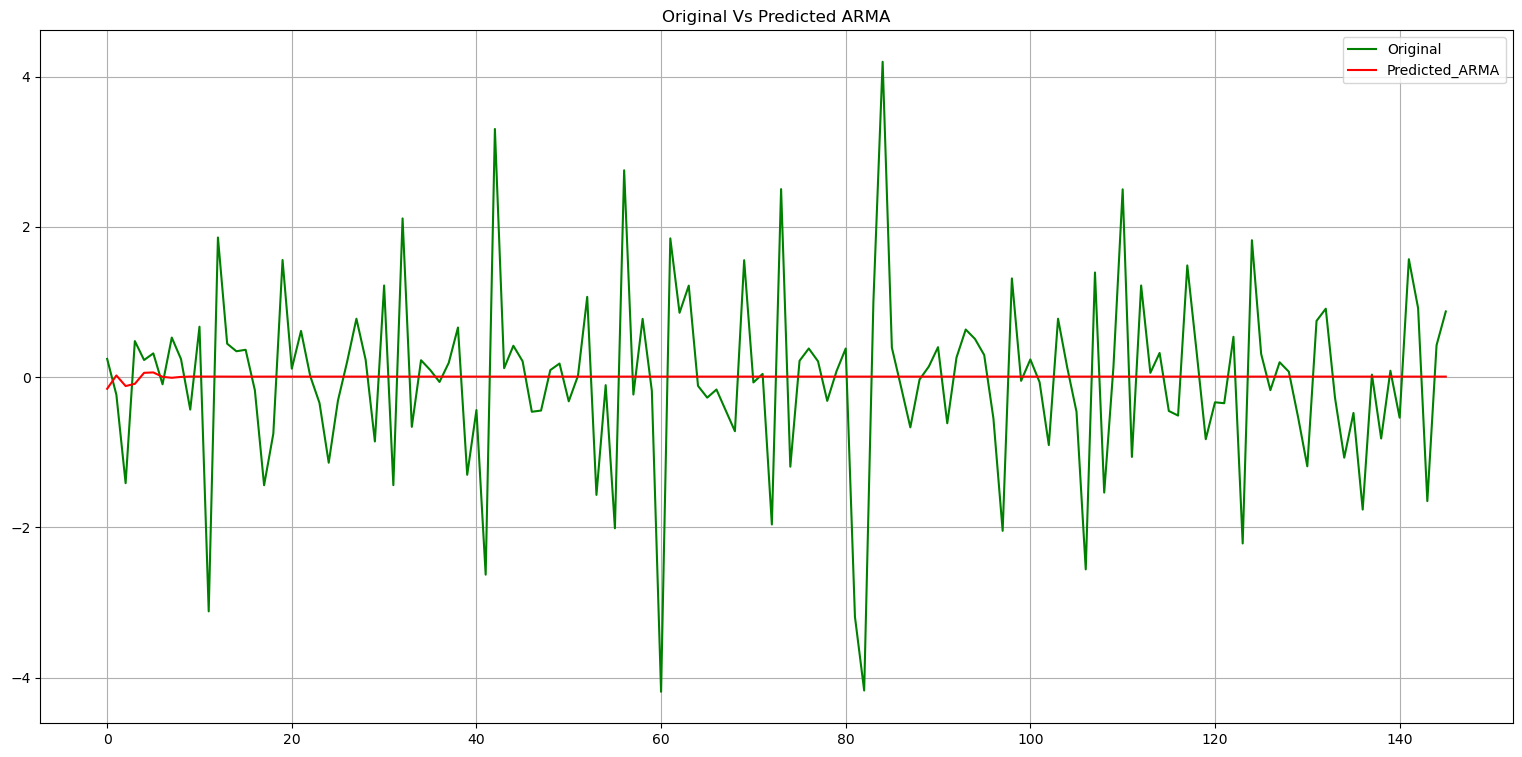

In [464]:
plt.plot(test,label='Original',color='green')
plt.plot(predict_arma,label='Predicted_ARMA',color='red')
plt.legend()
plt.title("Original Vs Predicted ARMA")
plt.grid()
plt.show()

# Lets Do ARIMA

In [465]:
import itertools
p=d=q=range(0,3)
pdq=itertools.product(p,d,q)

In [466]:
for i in pdq:
    try:
        model=ARIMA(train,order=i)
        model_fit=model.fit()
        print(i,model_fit.aic)
    except:
        continue

(0, 0, 0) 1589.8178725475277
(0, 0, 1) 1427.5318368808048
(0, 0, 2) 1393.1687586126382
(0, 1, 0) 2155.515867504139
(0, 1, 1) 1594.471569644773
(0, 1, 2) 1435.8299968089368
(0, 2, 0) 2822.0615442753565
(0, 2, 1) 2161.192528816291
(0, 2, 2) 1622.255347229758
(1, 0, 0) 1525.481073707534
(1, 0, 1) 1393.080705495681
(1, 0, 2) 1394.2048729288683
(1, 1, 0) 1918.7995013947157
(1, 1, 1) 1530.8132182260765
(1, 1, 2) 1401.075227969729
(1, 2, 0) 2435.828903543447
(1, 2, 1) 1925.7948003781828
(1, 2, 2) 1569.194137637834
(2, 0, 0) 1489.2071022000655
(2, 0, 1) 1393.9741696589087
(2, 0, 2) 1393.0013917086203
(2, 1, 0) 1796.9210960882613
(2, 1, 1) 1495.0534676184466
(2, 1, 2) 1532.7665534749099
(2, 2, 0) 2217.8497896700633
(2, 2, 1) 1804.854826869029
(2, 2, 2) 1512.441693284954


In [467]:
model_arima=ARIMA(train,order=(2,1,2))

In [468]:
model_arima_fit=model_arima.fit()

In [469]:
predict_arima=model_arima_fit.forecast(146)

In [470]:
predict_arima

array([-0.0730273 ,  0.03655444, -0.00320102,  0.01277934,  0.00493531,
        0.00995492,  0.00595445,  0.00955031,  0.0061489 ,  0.00942868,
        0.00624438,  0.00934346,  0.00632478,  0.00926601,  0.00639994,
        0.00919287,  0.00647118,  0.00912346,  0.00653882,  0.00905755,
        0.00660305,  0.00899496,  0.00666404,  0.00893552,  0.00672197,
        0.00887907,  0.00677698,  0.00882546,  0.00682921,  0.00877456,
        0.00687882,  0.00872622,  0.00692593,  0.00868031,  0.00697067,
        0.00863671,  0.00701316,  0.00859531,  0.0070535 ,  0.00855599,
        0.00709182,  0.00851865,  0.0071282 ,  0.00848319,  0.00716276,
        0.00844952,  0.00719557,  0.00841754,  0.00722673,  0.00838718,
        0.00725632,  0.00835834,  0.00728443,  0.00833095,  0.00731111,
        0.00830495,  0.00733646,  0.00828025,  0.00736052,  0.0082568 ,
        0.00738338,  0.00823452,  0.00740508,  0.00821337,  0.0074257 ,
        0.00819329,  0.00744527,  0.00817421,  0.00746386,  0.00

In [471]:
mse_arima=np.sqrt(mean_squared_error(test,predict_arima))

In [472]:
mse_arima

1.208980093360218

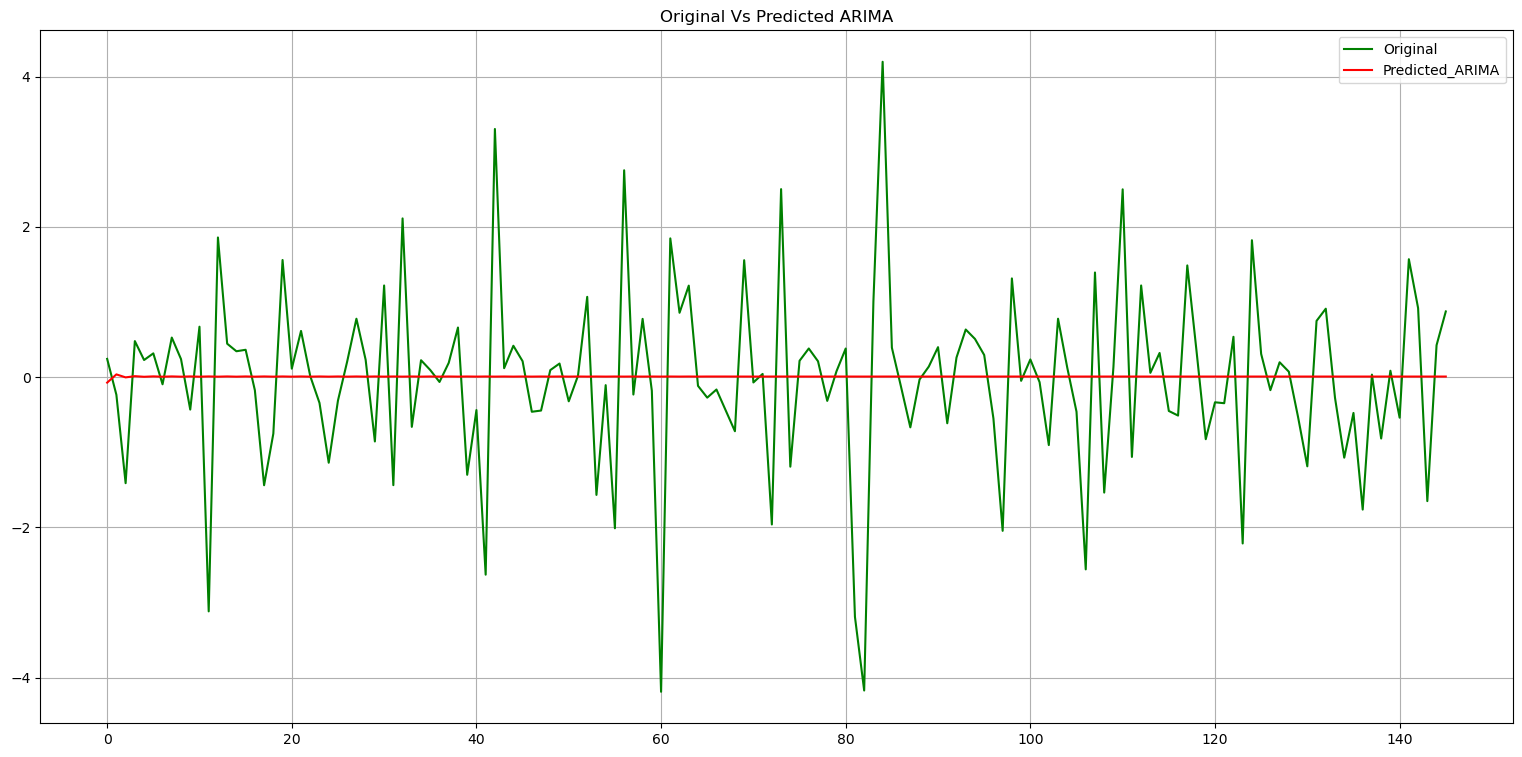

In [473]:
plt.plot(test,label='Original',color='green')
plt.plot(predict_arima,label='Predicted_ARIMA',color='red')
plt.legend()
plt.title("Original Vs Predicted ARIMA")
plt.grid()
plt.show()

# Lets Do SARIMAX

In [474]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [475]:
model_sarimax=SARIMAX(train,order=(4,1,4),seasonal_order=(4,1,4,12))

In [476]:
model_sarimax_fit=model_sarimax.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97088D+00    |proj g|=  1.03154D+00

At iterate    5    f=  1.31337D+00    |proj g|=  1.31678D-01

At iterate   10    f=  1.25611D+00    |proj g|=  4.84003D-02

At iterate   15    f=  1.20260D+00    |proj g|=  4.51895D-02

At iterate   20    f=  1.19648D+00    |proj g|=  6.46242D-03

At iterate   25    f=  1.19625D+00    |proj g|=  7.93212D-03

At iterate   30    f=  1.19436D+00    |proj g|=  2.08711D-02

At iterate   35    f=  1.19354D+00    |proj g|=  1.31509D-02

At iterate   40    f=  1.19324D+00    |proj g|=  6.01714D-03

At iterate   45    f=  1.19237D+00    |proj g|=  1.92993D-02

At iterate   50    f=  1.19132D+00    |proj g|=  5.65327D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [477]:
predict_sarimax=model_sarimax_fit.forecast(146)

In [478]:
predict_sarimax

array([-0.24074382, -0.62452369,  0.68420916,  0.21485843, -0.47807901,
        0.2336135 , -0.03722708,  0.01644016, -0.0041444 ,  0.02077342,
       -0.07697869,  0.06374173, -0.26053365,  0.17904926,  0.15375544,
       -0.01406739, -0.45847792,  0.48858156, -0.12804722,  0.08438142,
        0.19218732, -0.06627486, -0.24308544, -0.07170882,  0.12554354,
       -0.23524446,  0.37919315, -0.04141817, -0.19042918, -0.00715817,
       -0.04180568,  0.35220479,  0.01325062, -0.06674849,  0.01036262,
       -0.14157273, -0.01662891, -0.17697568,  0.38982317,  0.25939728,
       -0.53893284,  0.54174927, -0.21004887, -0.18760216, -0.02216434,
        0.1085089 , -0.04970946, -0.04239816, -0.1844026 , -0.02793934,
        0.34723948, -0.01840791, -0.38719204,  0.19890764,  0.02511085,
        0.33285188,  0.2270223 , -0.28569939, -0.16945152,  0.00915197,
        0.12325816, -0.13478596,  0.24294942, -0.03571105, -0.2358429 ,
        0.25097156, -0.2132554 ,  0.10071888, -0.08374565,  0.21

In [479]:
mse_sarimax=np.sqrt(mean_squared_error(predict_sarimax,test))

In [480]:
mse_sarimax

1.255680316772991

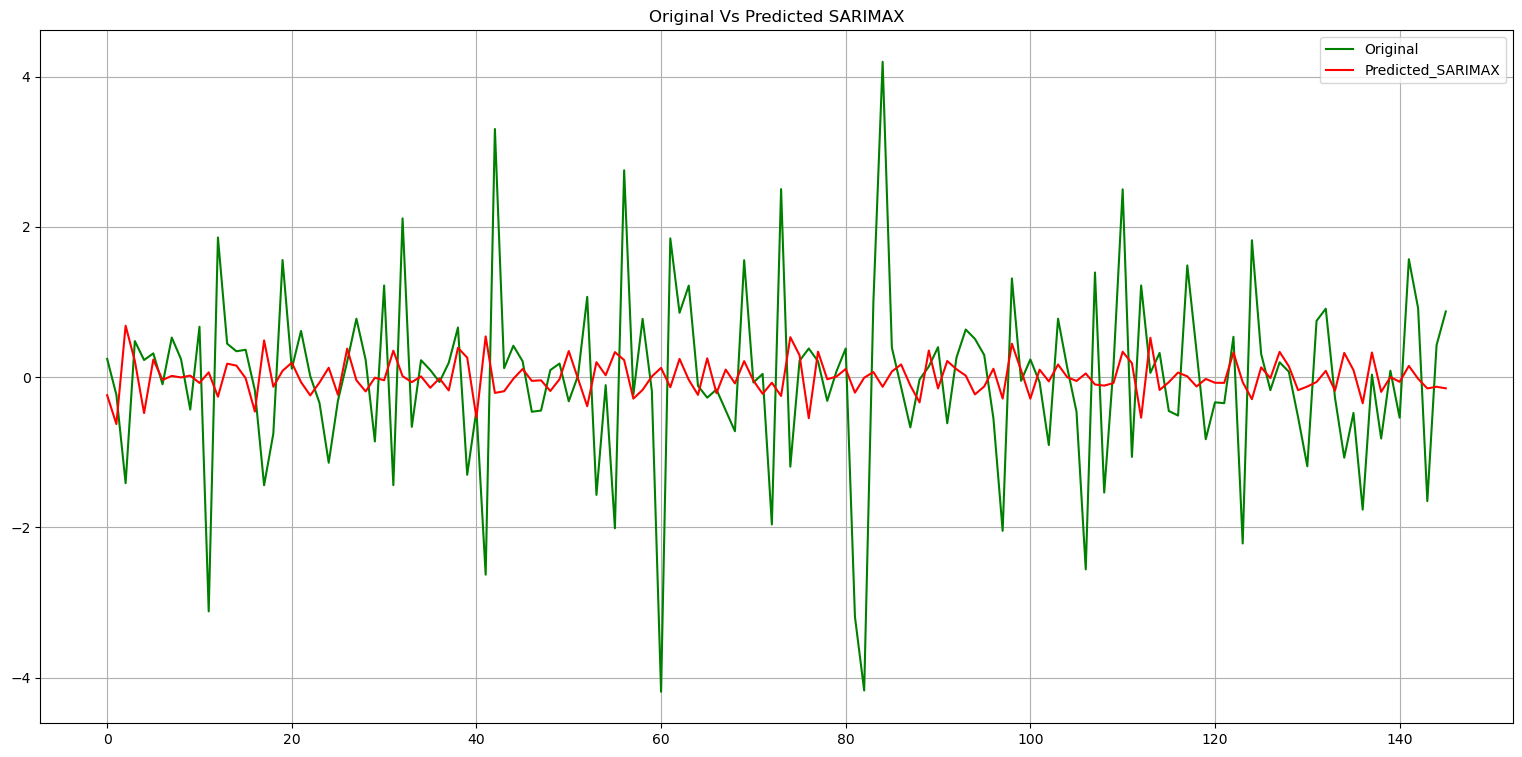

In [481]:
plt.plot(test,label='Original',color='green')
plt.plot(predict_sarimax,label='Predicted_SARIMAX',color='red')
plt.legend()
plt.title("Original Vs Predicted SARIMAX")
plt.grid()
plt.show()

# Lets Do Holt Winters Model

In [482]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [483]:
model_holt=ExponentialSmoothing(train,trend='add',seasonal_periods='add')

In [484]:
model_holt_fit=model_holt.fit()

In [485]:
predict_holt=model_holt_fit.forecast(146)

In [486]:
predict_holt

array([0.00755828, 0.00755723, 0.00755618, 0.00755513, 0.00755408,
       0.00755303, 0.00755198, 0.00755093, 0.00754988, 0.00754883,
       0.00754778, 0.00754673, 0.00754568, 0.00754463, 0.00754358,
       0.00754253, 0.00754148, 0.00754043, 0.00753938, 0.00753833,
       0.00753728, 0.00753623, 0.00753518, 0.00753413, 0.00753308,
       0.00753203, 0.00753098, 0.00752993, 0.00752888, 0.00752783,
       0.00752678, 0.00752573, 0.00752468, 0.00752363, 0.00752258,
       0.00752153, 0.00752048, 0.00751943, 0.00751838, 0.00751733,
       0.00751628, 0.00751523, 0.00751418, 0.00751313, 0.00751208,
       0.00751103, 0.00750998, 0.00750893, 0.00750788, 0.00750683,
       0.00750578, 0.00750473, 0.00750368, 0.00750263, 0.00750158,
       0.00750053, 0.00749948, 0.00749843, 0.00749738, 0.00749633,
       0.00749528, 0.00749423, 0.00749318, 0.00749213, 0.00749108,
       0.00749003, 0.00748898, 0.00748793, 0.00748688, 0.00748583,
       0.00748478, 0.00748373, 0.00748268, 0.00748163, 0.00748

In [487]:
mse_holt=np.sqrt(mean_squared_error(predict_holt,test))

In [488]:
mse_holt

1.2088116743886341

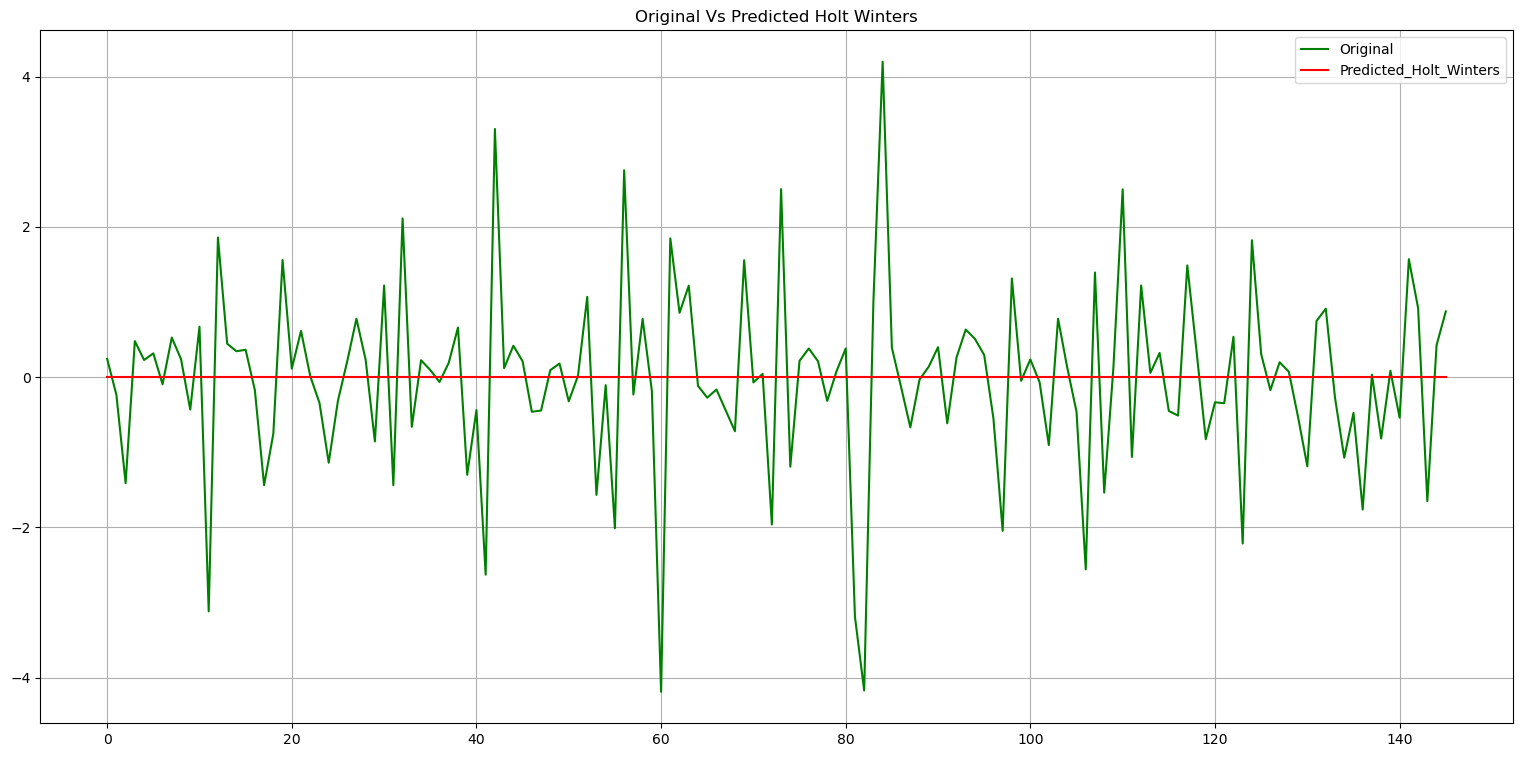

In [489]:
plt.plot(test,label='Original',color='green')
plt.plot(predict_holt,label='Predicted_Holt_Winters',color='red')
plt.legend()
plt.title("Original Vs Predicted Holt Winters")
plt.grid()
plt.show()